# MOVIE RATING PREDICTION WITH PYTHON
1. Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
2. Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading and reading 10 rows of data
dt = pd.read_csv('C:/Studies/Codsoft/Task2-IMDB_Rating_Prediction/IMDbMoviesIndia.csv')
dt.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [3]:
# looking into data information
dt.info()
# many NAN values can be seen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [4]:
# to check total null values in a column
dt.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
# looking into statistical and categorical information of data
dt.describe(include ='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981.000000,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,NaN,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,NaN,120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,NaN,240,2780,NaN,227,58,158,83,91
mean,NaN,-1987.012215,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,25.416689,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,-2022.000000,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,-2009.000000,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,-1991.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,-1968.000000,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [6]:
# copying data such that original is not affected
data = dt.copy(deep= True)

In [7]:
# these columns are removed on basis of its no logic with rating perspective and as per task given
cols = ['Name','Year','Duration','Votes']
data.drop(columns= cols, axis = 1, inplace=True)

In [8]:
# to find distinct values in each column
for i in data.columns:
    print(f'{i}:\n{data[i].unique()}\n')

Genre:
['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family, Musical

In [9]:
# splitting genre column records on basis of comma separated values and making the separated values to be given as new record using explode feature
data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre')
data['Genre'].fillna(data['Genre'].mode()[0], inplace=True)
print(data.info())
# around 10k rows increased due to explode feature

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24950 entries, 0 to 15508
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Genre     24950 non-null  object 
 1   Rating    15837 non-null  float64
 2   Director  24408 non-null  object 
 3   Actor 1   23167 non-null  object 
 4   Actor 2   22277 non-null  object 
 5   Actor 3   21425 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.3+ MB
None


In [10]:
data.isnull().sum()

Genre          0
Rating      9113
Director     542
Actor 1     1783
Actor 2     2673
Actor 3     3525
dtype: int64

In [11]:
# dropping duplicate records
data.drop_duplicates(keep = 'first', inplace=True)
# Remove rows with missing values in all columns (excluding 'Genre' and 'Rating')
data.dropna(subset=data.columns[2:], how='all', inplace=True)

In [12]:
data.info()
# around 840 rows dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24087 entries, 0 to 15508
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Genre     24087 non-null  object 
 1   Rating    15827 non-null  float64
 2   Director  24087 non-null  object 
 3   Actor 1   23098 non-null  object 
 4   Actor 2   22250 non-null  object 
 5   Actor 3   21401 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.3+ MB


In [13]:
data.isnull().sum()

Genre          0
Rating      8260
Director       0
Actor 1      989
Actor 2     1837
Actor 3     2686
dtype: int64

In [14]:
# making a copy for different case below
data2 = data.copy(deep=True)

In [15]:
# importing Regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [16]:
# importing metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Case 1: To fill all NAN values and keeping the records.

In [17]:
data.describe(include='all')

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
count,24087,15827.000000,24087,23098,22250,21401
unique,24,NaN,5938,4718,4891,4820
top,Drama,NaN,David Dhawan,Ashok Kumar,Rekha,Pran
freq,8714,NaN,110,311,173,176
mean,NaN,5.823542,NaN,NaN,NaN,NaN
std,NaN,1.366780,NaN,NaN,NaN,NaN
min,NaN,1.100000,NaN,NaN,NaN,NaN
25%,NaN,4.900000,NaN,NaN,NaN,NaN
50%,NaN,6.000000,NaN,NaN,NaN,NaN
75%,NaN,6.800000,NaN,NaN,NaN,NaN


In [18]:
# filling rating NAN values with median and Actor NAN values with mode
data['Rating'].fillna(data['Rating'].median(),inplace=True)
data['Actor 1'].fillna(data['Actor 1'].mode()[0],inplace=True)
data['Actor 2'].fillna(data['Actor 2'].mode()[0],inplace=True)
data['Actor 3'].fillna(data['Actor 3'].mode()[0],inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24087 entries, 0 to 15508
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Genre     24087 non-null  object 
 1   Rating    24087 non-null  float64
 2   Director  24087 non-null  object 
 3   Actor 1   24087 non-null  object 
 4   Actor 2   24087 non-null  object 
 5   Actor 3   24087 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.3+ MB


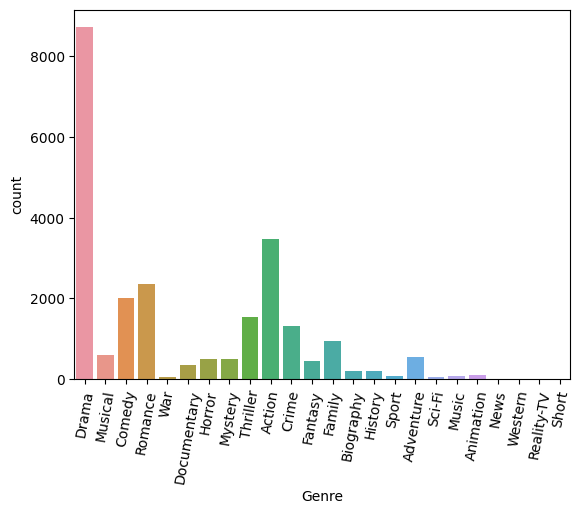

In [20]:
# Plot showing which Genre is highest 
sns.countplot(data=data, x = 'Genre')
plt.xticks(rotation = 80)
plt.show()
# in this we can see most of movies are based on Drama plots while Action plots and Romance plots being second & Third in line respectively.
# whereas there is movies made based on War, Sci-Fi, Music, Animation, News, Western, Reality-Tv, Short plots.

In [21]:
# Grouping the columns with their average rating and then creating a new feature
data['gnr_avg_rating'] = data.groupby('Genre')['Rating'].transform('mean')
data['dir_avg_rating'] = data.groupby('Director')['Rating'].transform('mean')
data['act1_avg_rating'] = data.groupby('Actor 1')['Rating'].transform('mean')
data['act2_avg_rating'] = data.groupby('Actor 2')['Rating'].transform('mean')
data['act3_avg_rating'] = data.groupby('Actor 3')['Rating'].transform('mean')

In [22]:
data

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,gnr_avg_rating,dir_avg_rating,act1_avg_rating,act2_avg_rating,act3_avg_rating
0,Drama,6.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,5.998898,5.850000,6.000000,5.661224,6.000000
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,5.998898,7.000000,6.850000,7.000000,7.000000
2,Drama,6.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,5.998898,6.000000,6.400000,6.675000,6.000000
2,Musical,6.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,6.132653,6.000000,6.400000,6.675000,6.000000
3,Comedy,4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.790015,4.400000,5.250000,4.400000,4.460000
...,...,...,...,...,...,...,...,...,...,...,...
15505,Action,4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.613863,5.175000,5.465919,4.613333,5.682292
15505,Drama,4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.998898,5.175000,5.465919,4.613333,5.682292
15506,Action,6.0,Kiran Thej,Sangeeta Tiwari,Rekha,Pran,5.613863,6.000000,6.000000,6.072786,6.106045
15508,Action,6.2,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,5.613863,4.223684,5.841581,5.558025,5.387500


In [23]:
data.columns

Index(['Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3',
       'gnr_avg_rating', 'dir_avg_rating', 'act1_avg_rating',
       'act2_avg_rating', 'act3_avg_rating'],
      dtype='object')

In [24]:
# importing train test model and loading independent variables to x and dependent variables to y
from sklearn.model_selection import train_test_split
x = data[['gnr_avg_rating', 'dir_avg_rating', 'act1_avg_rating', 'act2_avg_rating', 'act3_avg_rating']]
y = data['Rating']

In [25]:
# assigning variables in train test split where test size is 30%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [26]:
# Linear Regression algorithm
lr = LinearRegression()
lr.fit(x_train,y_train)
lpred = lr.predict(x_test)
lmae = mean_absolute_error(y_test,lpred)
lmse = mean_squared_error(y_test,lpred)
lr2 = r2_score(y_test,lpred)
print(f'The mean absolute score is: {lmae}\nThe mean squared error is: {lmse}\nThe root mean squared error is: {np.sqrt(lmse)}\nR2 score is: {lr2}')

The mean absolute score is: 0.41750672982917514
The mean squared error is: 0.3580170094388167
The root mean squared error is: 0.5983452259681
R2 score is: 0.7082396585969182


In [27]:
# Decision Tree algorithm
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dpred = dtr.predict(x_test)
dmae = mean_absolute_error(y_test,dpred)
dmse = mean_squared_error(y_test,dpred)
dr2 = r2_score(y_test,dpred)
print(f'The mean absolute score is: {dmae}\nThe mean squared error is: {dmse}\nThe root mean squared error is: {np.sqrt(dmse)}\nR2 score is: {dr2}')

The mean absolute score is: 0.2025446243254463
The mean squared error is: 0.268670232000369
The root mean squared error is: 0.5183340930330254
R2 score is: 0.7810514122327786


In [28]:
# Random Forest algorithm
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rpred = rfr.predict(x_test)
rmae = mean_absolute_error(y_test,rpred)
rmse = mean_squared_error(y_test,rpred)
rr2 = r2_score(y_test,rpred)
print(f'The mean absolute score is: {rmae}\nThe mean squared error is: {rmse}\nThe root mean squared error is: {np.sqrt(rmse)}\nR2 score is: {rr2}')

The mean absolute score is: 0.21342650186360232
The mean squared error is: 0.15552541989567756
The root mean squared error is: 0.39436711310107686
R2 score is: 0.873257000619198


In [29]:
# Scalar Vector Machine algorithm
svm = SVR()
svm.fit(x_train,y_train)
spred = svm.predict(x_test)
smae = mean_absolute_error(y_test,spred)
smse = mean_squared_error(y_test,spred)
sr2 = r2_score(y_test,spred)
print(f'The mean absolute score is: {smae}\nThe mean squared error is: {smse}\nThe root mean squared error is: {np.sqrt(smse)}\nR2 score is: {sr2}')

The mean absolute score is: 0.35005906913884377
The mean squared error is: 0.319416086262271
The root mean squared error is: 0.5651690775885311
R2 score is: 0.7396968749512929


Note:
1. This case is done and shown as a case study. If the required nan values should be dropped or not. This situation depends on the person who gave the problem statement as of how he wants the model to be predicted and how much important records are.
2. Except Random Forest Regressor which gave r2 score of 0.87 all the algorithms gave r2 score in 0.70s.  Same goes for MSE, RMSE and MAE.
3. The purpose to show these many algorithms and metrics is for reference and knowledge of which works better, or else i could create a simple def where it accepts models and data and then make a for loop to input all models rather than this tedious work. It requires just one cell.

# Case 2: To drop maximum NAN values possible

In [30]:
# dropping all Rating NAN values
data2.dropna(subset='Rating',how='any', inplace = True)

In [31]:
data2.isna().sum()

Genre         0
Rating        0
Director      0
Actor 1     159
Actor 2     266
Actor 3     378
dtype: int64

In [32]:
# filling the left NAN values of other columns
data2['Actor 1'].fillna(data2['Actor 1'].mode()[0],inplace=True)
data2['Actor 2'].fillna(data2['Actor 2'].mode()[0],inplace=True)
data2['Actor 3'].fillna(data2['Actor 3'].mode()[0],inplace=True)
data2.isna().sum()

Genre       0
Rating      0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

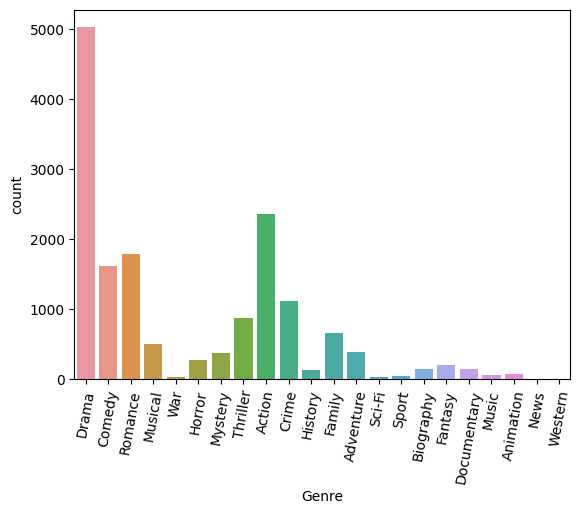

In [33]:
sns.countplot(data=data2, x = 'Genre')
plt.xticks(rotation = 80)
plt.show()
# same observation as above case 1 plot.

In [34]:
# Grouping the columns with their average rating and then creating a new feature
data2['gnr_avg_rating'] = data2.groupby('Genre')['Rating'].transform('mean')
data2['dir_avg_rating'] = data2.groupby('Director')['Rating'].transform('mean')
data2['act1_avg_rating'] = data2.groupby('Actor 1')['Rating'].transform('mean')
data2['act2_avg_rating'] = data2.groupby('Actor 2')['Rating'].transform('mean')
data2['act3_avg_rating'] = data2.groupby('Actor 3')['Rating'].transform('mean')

In [35]:
data2

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,gnr_avg_rating,dir_avg_rating,act1_avg_rating,act2_avg_rating,act3_avg_rating
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,5.998089,7.000000,6.850000,7.000000,7.000000
3,Comedy,4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.737290,4.400000,5.250000,4.400000,4.460000
3,Romance,4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.750533,4.400000,5.250000,4.400000,4.460000
5,Comedy,4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.737290,5.353846,4.793617,5.730000,5.909091
5,Drama,4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.998089,5.353846,4.793617,5.730000,5.909091
...,...,...,...,...,...,...,...,...,...,...,...
15504,Action,4.6,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,5.429894,3.970000,6.065347,3.400000,4.600000
15505,Action,4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.429894,5.175000,5.440845,4.613333,5.618750
15505,Drama,4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.998089,5.175000,5.440845,4.613333,5.618750
15508,Action,6.2,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,5.429894,4.223684,5.838246,5.522667,5.183333


In [36]:
data2.columns

Index(['Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3',
       'gnr_avg_rating', 'dir_avg_rating', 'act1_avg_rating',
       'act2_avg_rating', 'act3_avg_rating'],
      dtype='object')

In [37]:
# importing train test model and loading independent variables to x and dependent variables to y
x2 = data2[['gnr_avg_rating', 'dir_avg_rating', 'act1_avg_rating', 'act2_avg_rating', 'act3_avg_rating']]
y2 = data2['Rating']

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.3,random_state=1)

In [39]:
# Linear Regression algorithm
lr = LinearRegression()
lr.fit(x_train,y_train)
lpred = lr.predict(x_test)
lmae = mean_absolute_error(y_test,lpred)
lmse = mean_squared_error(y_test,lpred)
lr2 = r2_score(y_test,lpred)
print(f'The mean absolute score is: {lmae}\nThe mean squared error is: {lmse}\nThe root mean squared error is: {np.sqrt(lmse)}\nR2 score is: {lr2}')

The mean absolute score is: 0.5173967699897708
The mean squared error is: 0.4827744693266838
The root mean squared error is: 0.6948197387284588
R2 score is: 0.7429561872794896


In [40]:
# Decision Tree algorithm
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dpred = dtr.predict(x_test)
dmae = mean_absolute_error(y_test,dpred)
dmse = mean_squared_error(y_test,dpred)
dr2 = r2_score(y_test,dpred)
print(f'The mean absolute score is: {dmae}\nThe mean squared error is: {dmse}\nThe root mean squared error is: {np.sqrt(dmse)}\nR2 score is: {dr2}')

The mean absolute score is: 0.2537271004421985
The mean squared error is: 0.34417719519898926
The root mean squared error is: 0.5866661701504436
R2 score is: 0.8167495919393065


In [41]:
# Random Forest algorithm
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rpred = rfr.predict(x_test)
rmae = mean_absolute_error(y_test,rpred)
rmse = mean_squared_error(y_test,rpred)
rr2 = r2_score(y_test,rpred)
print(f'The mean absolute score is: {rmae}\nThe mean squared error is: {rmse}\nThe root mean squared error is: {np.sqrt(rmse)}\nR2 score is: {rr2}')

The mean absolute score is: 0.2713802741262156
The mean squared error is: 0.21719314012433305
The root mean squared error is: 0.4660398482150781
R2 score is: 0.8843597655191645


In [42]:
# Scalar Vector Machine algorithm
svm = SVR()
svm.fit(x_train,y_train)
spred = svm.predict(x_test)
smae = mean_absolute_error(y_test,spred)
smse = mean_squared_error(y_test,spred)
sr2 = r2_score(y_test,spred)
print(f'The mean absolute score is: {smae}\nThe mean squared error is: {smse}\nThe root mean squared error is: {np.sqrt(smse)}\nR2 score is: {sr2}')

The mean absolute score is: 0.44053368540249227
The mean squared error is: 0.421322766685221
The root mean squared error is: 0.6490938042264931
R2 score is: 0.7756749430313393


Note:
1. This case is done and shown as a case study. If the required nan values should be dropped or not. This situation depends on the person who gave the problem statement as of how he wants the model to be predicted and how much important records are.
2. Except Decision Tree and Random Forest Regressor which gave r2 score of 0.81 & 0.88, all the algorithms gave r2 scores in 0.70s. Same goes for MSE, RMSE and MAE.
3. The purpose to show these many algorithms and metrics is for reference and knowledge of which works better, or else i could create a simple def where it accepts models and data and then make a for loop to input all models rather than this tedious work. It requires just one cell.